In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [4]:
print("size of the dataset:",df.shape)
print("name of the columns",df.columns)

size of the dataset: (8425, 23)
name of the columns Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
#first remove duplicates & recheck the size
df.drop_duplicates(inplace=True)

print(df.shape)

(6762, 23)


After removing duplicate, our data reduce from 8425 to 6762

In [7]:
# let's change the date column from object to datetime
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
# extract day,month and year for better understanding of the model
df['Month']=df['Date'].apply(lambda x:x.month) 
df['Day']=df['Date'].apply(lambda x:x.day)  
df['year']=df['Date'].apply(lambda x:x.year) 

In [9]:
# lets drop date column
df.drop("Date",axis=1,inplace = True)

In [10]:
# here, I am using Interpolation for handling missing value

Interpolation: 

Interpolation methods estimate missing values based on the available data points. Common interpolation techniques include linear interpolation, polynomial interpolation, and spline interpolation.

For Continuous Columns:

Linear interpolation, polynomial interpolation, and spline interpolation are suitable methods for filling missing values in continuous columns.

In [11]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].interpolate(method='linear', inplace=True) 

In [12]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Handle missing values in categorical columns using mode
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation      907
Sunshine         907
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           2
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
Month              0
Day                0
year               0
dtype: int64

The variables "Evaporation" and "Sunshine" still contain outliers, and missing values are located at the beginning and end of the dataset, making interpolation inaccurate. Therefore, it is essential to handle these outliers and missing values effectively.

In [14]:
df["Evaporation"] = df["Evaporation"].fillna(df["Evaporation"].mean())
df["Sunshine"] = df["Sunshine"].fillna(df["Sunshine"].mean())

In [15]:
df["Cloud3pm"] = df["Cloud3pm"].fillna(df["Cloud3pm"].mean())

In [16]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
year             0
dtype: int64

In [17]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.108836,24.108503,2.978217,7.257131,8.692442,38.300429,12.730331,17.593833,67.567657,50.463324,1018.665343,1015.727418,4.298211,4.121820,17.900222,22.719055,6.462141,15.737208,2012.052203
std,5.561909,6.149542,10.931806,8.014326,3.056251,14.240512,9.829059,9.646323,17.222478,18.626494,6.403870,6.113283,2.897597,2.689265,5.738197,5.986658,3.377471,8.793898,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.500000,0.000000,4.000000,7.800000,28.000000,6.000000,9.000000,56.000000,37.000000,1014.200000,1011.500000,1.000000,1.000000,13.800000,18.400000,4.000000,8.000000,2010.000000
50%,13.200000,23.500000,0.000000,5.793870,8.829487,37.000000,11.000000,17.000000,68.000000,50.000000,1019.600000,1016.800000,5.000000,4.000000,18.000000,22.200000,6.000000,16.000000,2012.000000
75%,17.500000,28.400000,1.000000,7.257131,11.100000,46.633354,19.000000,24.000000,81.000000,63.000000,1023.200000,1019.400000,7.000000,7.000000,22.200000,26.800000,9.000000,23.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,12.000000,31.000000,2017.000000


In the statistical analysis of the dataset, the mean and median of all columns show slight differences, indicating relatively symmetric data distribution. However, further investigation is needed to check for skewness. Moreover, a significant number of columns exhibit a notable difference between the 75th percentile and the maximum value, indicating the presence of outliers. To ensure accurate analysis, a detailed approach for handling outliers should be implemented.

In [18]:
conti_col = df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm',
 'Month','Day','year']]

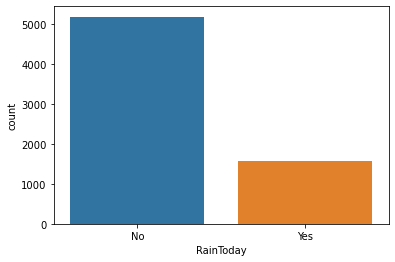

In [19]:
sns.countplot(x='RainToday',data=df)
plt.show()

Here we can understand the precipitation amount was 1 mm or less, or if there was no rain at all in the specific day.

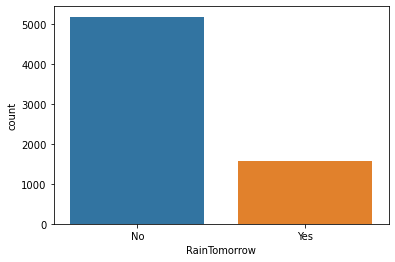

In [20]:
sns.countplot(x='RainTomorrow',data=df)
plt.show()

Through the collected data we can understand that there is no rain or less than 1mm rain in tomorrow

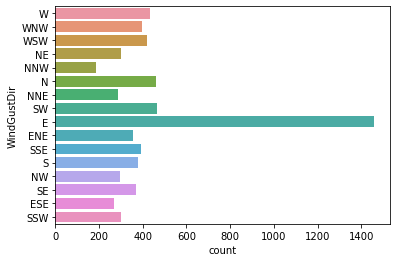

In [21]:
sns.countplot(y='WindGustDir',data=df)
plt.show()

The direction of the strongest wind in 24 hours from East 

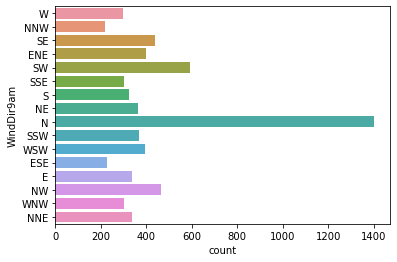

In [22]:
sns.countplot(y='WindDir9am',data=df)
plt.show()

The average wind speed measured every 10 minutes (up to 9am) is notably higher when coming from the North direction. This implies that the wind tends to be stronger and more prevalent when it blows from the North compared to other directions. 

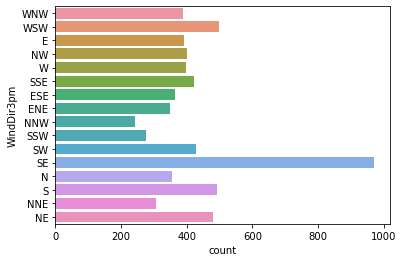

In [23]:
sns.countplot(y='WindDir3pm',data=df)
plt.show()

The average wind speed measured every 10 minutes (up to 3pm) is notably higher when coming from the Southeast direction. This implies that the wind tends to be stronger and more prevalent when it blows from the SouthEast compared to other directions.

In [24]:
df["RainTomorrow"].value_counts()

No     5190
Yes    1572
Name: RainTomorrow, dtype: int64

This is our one of the target and this is classification type and here, we can see the imbalancing issue so need to handle it

In [25]:
df["Rainfall"].value_counts()

0.000000     4347
0.200000      325
0.400000      145
0.600000       87
1.200000       70
             ... 
15.700000       1
45.800000       1
3.200000        1
37.600000       1
0.866667        1
Name: Rainfall, Length: 339, dtype: int64

it is continues type problem

In [26]:
#"WindDir9am, WindDir3pm" drop these two columns bcs we have another column which is the average value of these two column
df.drop(["WindDir9am", "WindDir3pm"],axis = 1, inplace= True)

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
code = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=code.fit_transform(df[i].values.reshape(-1,1))

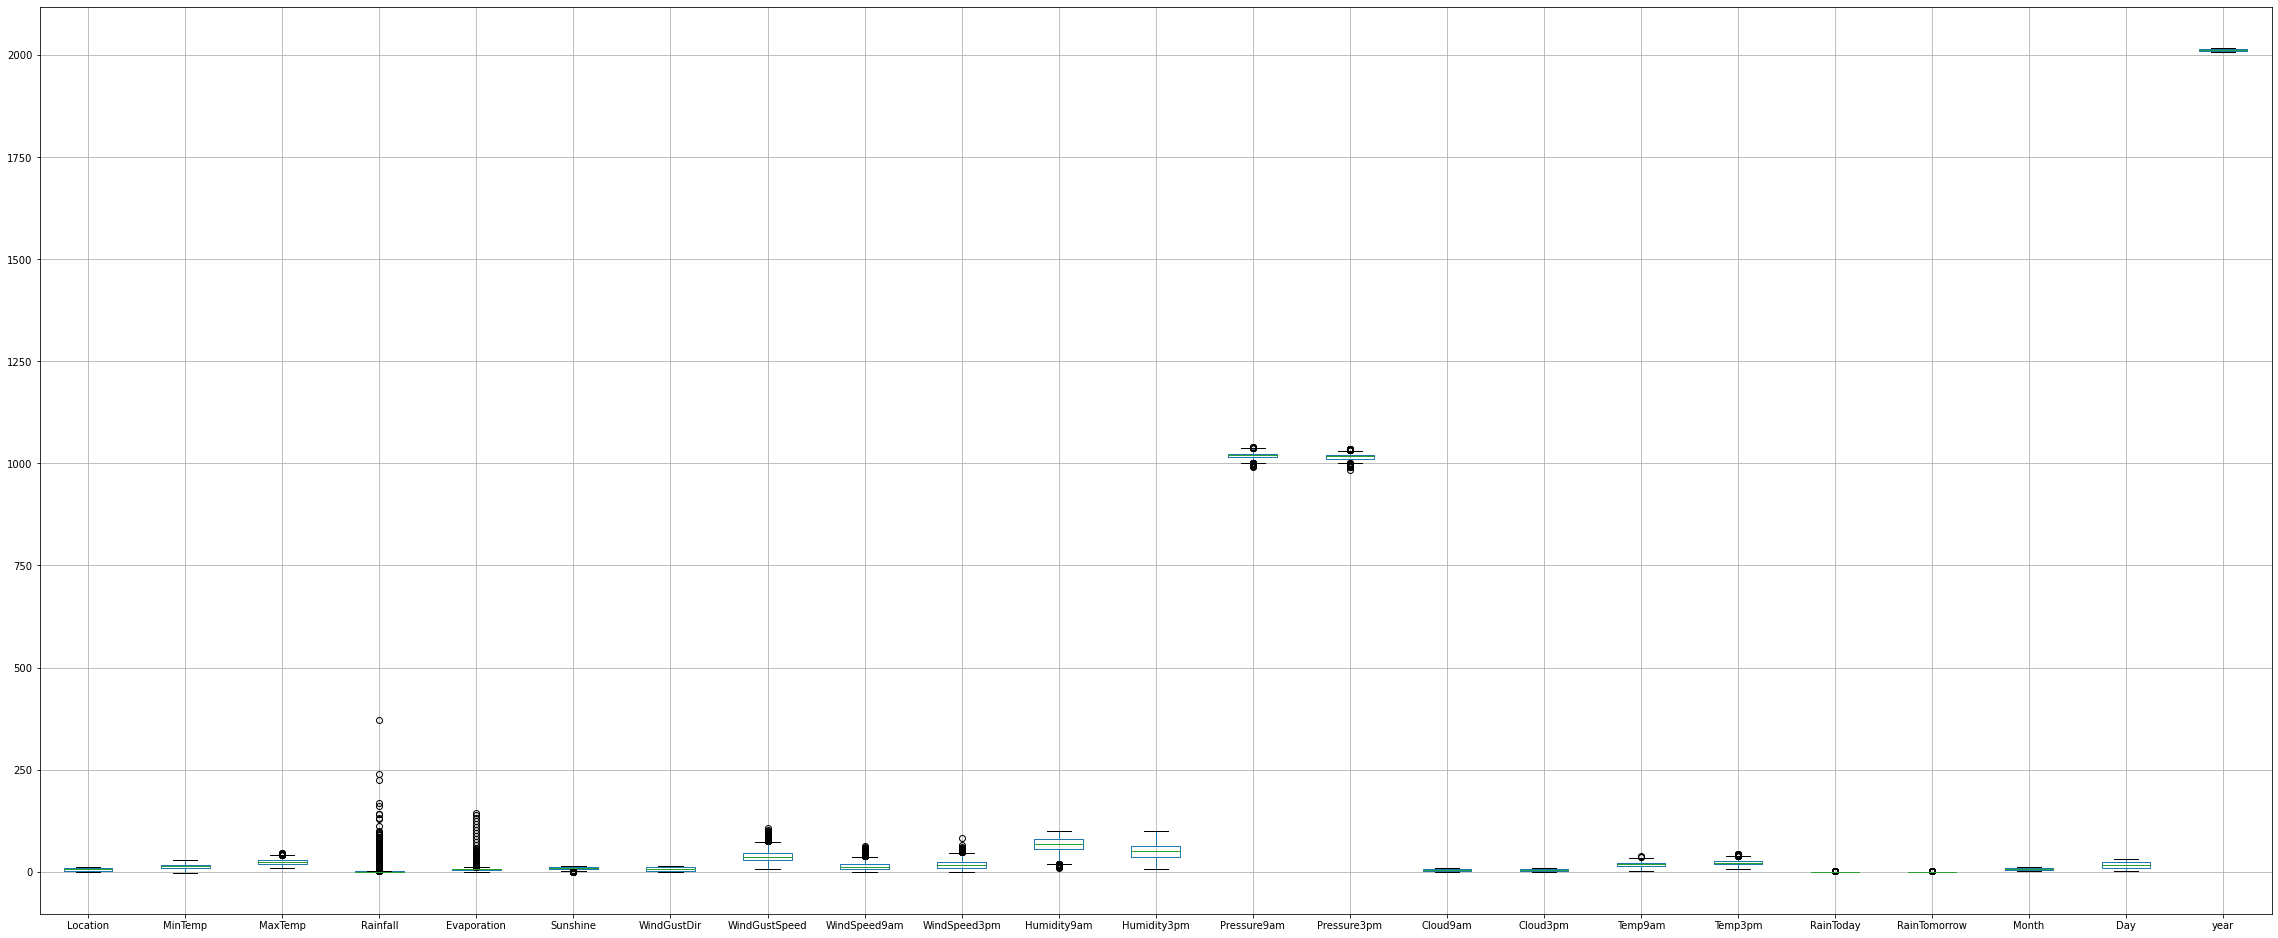

In [29]:
df.boxplot(figsize=(40,20))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [30]:
# handle outliers
from scipy.stats import zscore

In [31]:
# Target column : RainTomorrow

In [32]:
# drop year bcs it is not neccessary for prediction
df.drop("year",axis = 1, inplace=True)

In [33]:
variables = df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am',
               'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','Month','Day']]
z = np.abs(zscore(variables))
z.shape

(6762, 17)

In [34]:
threshold = 3
print (np.where(z>3))

(array([  12,   12,   44,   44,   52,   60,   60,   61,   61,   62,   62,
         62,   67,   68,   68,  123,  267,  271,  296,  381,  405,  406,
        407,  431,  462,  563,  568,  602,  683,  683,  699,  713,  748,
        748,  796,  797,  802,  928,  929,  935,  949,  979,  980,  980,
       1008, 1009, 1011, 1138, 1148, 1149, 1151, 1203, 1237, 1241, 1264,
       1265, 1357, 1411, 1412, 1479, 1480, 1481, 1513, 1661, 1673, 1680,
       1774, 1818, 1819, 2108, 2116, 2199, 2200, 2201, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2859,
       2877, 2890, 2898, 2900, 2901, 2909, 3003, 3051, 3051, 3058, 3059,
       3059, 3066, 3067, 3070, 3082, 3089, 3099, 3167, 3172, 3173, 3174,
       3175, 3176, 3177, 3178, 3202, 3203, 3204, 3205, 3206, 3212, 3212,
       3213, 3221, 3233, 3234, 3234, 3235, 3236, 3237, 3238, 3239, 3240,
       3241, 3241, 3242, 3242, 3243, 3243, 3244, 3244, 3245, 3245, 3246,
       3246, 3247, 3247, 3248, 3248, 3258, 3259, 3

In [35]:
print('Shape before removing outliers:', df.shape)

df_new = df[(z < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new.shape)

Shape before removing outliers: (6762, 22)
Shape after removing outliers: (6395, 22)


when remove outlier we lost all the data

In [36]:
variables = df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am',
               'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','Month','Day']]
def remove_outliers_iqr(df, threshold=1.5):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Replace outliers with NaN or remove them from the DataFrame
    df_cleaned = df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

    return df_cleaned

df_new = remove_outliers_iqr(df)

In [37]:
print('Shape before removing outliers:', df.shape)

df_new = df[(z < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new.shape)

Shape before removing outliers: (6762, 22)
Shape after removing outliers: (6395, 22)


In [38]:
# target column: Rainfall

In [39]:
variables_2 =  df[['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am',
               'Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','Month','Day']]
z1 = np.abs(zscore(variables_2))
z1.shape

(6762, 16)

In [40]:
threshold = 3
print (np.where(z1>3))

(array([  12,   12,   44,   44,   52,   60,   60,   61,   61,   62,   62,
         62,   67,   68,   68,  123,  267,  271,  296,  381,  405,  406,
        407,  563,  568,  602,  683,  683,  748,  748,  980, 2500, 2505,
       2527, 2527, 2859, 2877, 3051, 3058, 3059, 3059, 3066, 3067, 3070,
       3082, 3089, 3099, 3167, 3172, 3173, 3174, 3175, 3176, 3177, 3178,
       3202, 3203, 3204, 3205, 3206, 3212, 3212, 3213, 3221, 3233, 3234,
       3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244,
       3245, 3246, 3247, 3248, 3258, 3259, 3260, 3261, 3262, 3263, 3264,
       3265, 3266, 3267, 3268, 3269, 3270, 3271, 3272, 3273, 3274, 3275,
       3276, 3277, 3278, 3278, 3279, 3280, 3280, 3281, 3282, 3283, 3284,
       3285, 3286, 3287, 3288, 3289, 3290, 3291, 3291, 3292, 3293, 3294,
       3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3302, 3302, 3303,
       3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313,
       3314, 3315, 3316, 3317, 3318, 3319, 3320, 3

In [41]:
print('Shape before removing outliers:', df.shape)

df_new1 = df[(z1 < threshold).all(axis=1)]

print('Shape after removing outliers:', df_new1.shape)

Shape before removing outliers: (6762, 22)
Shape after removing outliers: (6479, 22)


here also same case

In [42]:
# target column : RainTomorrow and Rainfall
df.skew()

Location         -0.000009
MinTemp          -0.085631
MaxTemp           0.321986
Rainfall         12.620693
Evaporation       5.969229
Sunshine         -1.191892
WindGustDir       0.105287
WindGustSpeed     0.701243
WindSpeed9am      0.953443
WindSpeed3pm      0.543464
Humidity9am      -0.261277
Humidity3pm       0.155937
Pressure9am      -0.348051
Pressure3pm      -0.223762
Cloud9am         -0.166064
Cloud3pm         -0.000762
Temp9am          -0.049811
Temp3pm           0.341222
RainToday         1.266937
RainTomorrow      1.266937
Month             0.021988
Day               0.006240
dtype: float64

skewed variables as threshold value +/- 0.5 : Rainfall, Evaporation, Sunshine, WindGustSpeed

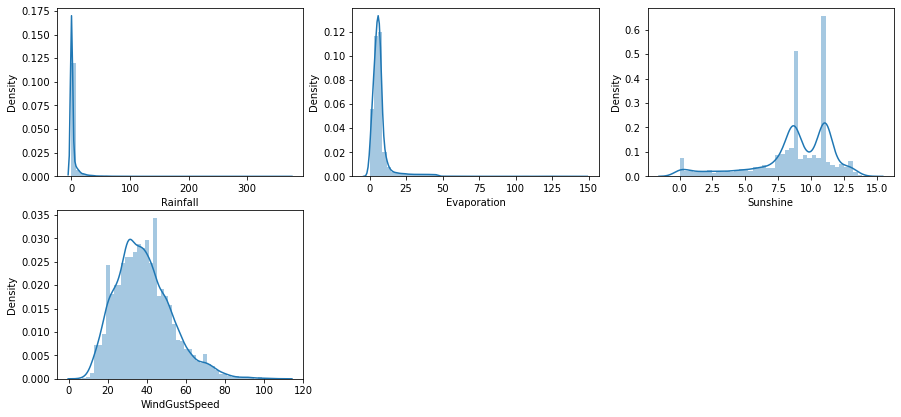

In [43]:
cat_list =['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']
plt.figure(figsize=(15,18))
plotnumber = 1

for column in df[cat_list]:
    if plotnumber<=10:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [44]:
for i in cat_list:
    if df.skew().loc[i]>0.55:
        df[i] = np.log1p(df[i])
df.skew()

Location        -0.000009
MinTemp         -0.085631
MaxTemp          0.321986
Rainfall         1.858794
Evaporation      0.576731
Sunshine        -1.191892
WindGustDir      0.105287
WindGustSpeed   -0.335511
WindSpeed9am     0.953443
WindSpeed3pm     0.543464
Humidity9am     -0.261277
Humidity3pm      0.155937
Pressure9am     -0.348051
Pressure3pm     -0.223762
Cloud9am        -0.166064
Cloud3pm        -0.000762
Temp9am         -0.049811
Temp3pm          0.341222
RainToday        1.266937
RainTomorrow     1.266937
Month            0.021988
Day              0.006240
dtype: float64

In [45]:
cat_list = ('Rainfall','Sunshine')
for i in cat_list:
    if df.skew().loc[i]>0.55:
        df[i] = np.sqrt(df[i])
df.skew()

Location        -0.000009
MinTemp         -0.085631
MaxTemp          0.321986
Rainfall         1.171768
Evaporation      0.576731
Sunshine        -1.191892
WindGustDir      0.105287
WindGustSpeed   -0.335511
WindSpeed9am     0.953443
WindSpeed3pm     0.543464
Humidity9am     -0.261277
Humidity3pm      0.155937
Pressure9am     -0.348051
Pressure3pm     -0.223762
Cloud9am        -0.166064
Cloud3pm        -0.000762
Temp9am         -0.049811
Temp3pm          0.341222
RainToday        1.266937
RainTomorrow     1.266937
Month            0.021988
Day              0.006240
dtype: float64

In [46]:
from sklearn.preprocessing  import power_transform, StandardScaler

In [47]:
cat_list = ('Rainfall','Sunshine')
for i in cat_list:
    if df.skew().loc[i]>0.55:
        df[i] = power_transform(df[[i]], method='yeo-johnson')
df.skew()

Location        -0.000009
MinTemp         -0.085631
MaxTemp          0.321986
Rainfall         0.676307
Evaporation      0.576731
Sunshine        -1.191892
WindGustDir      0.105287
WindGustSpeed   -0.335511
WindSpeed9am     0.953443
WindSpeed3pm     0.543464
Humidity9am     -0.261277
Humidity3pm      0.155937
Pressure9am     -0.348051
Pressure3pm     -0.223762
Cloud9am        -0.166064
Cloud3pm        -0.000762
Temp9am         -0.049811
Temp3pm          0.341222
RainToday        1.266937
RainTomorrow     1.266937
Month            0.021988
Day              0.006240
dtype: float64

after using these methods sunshine has nothing change more 

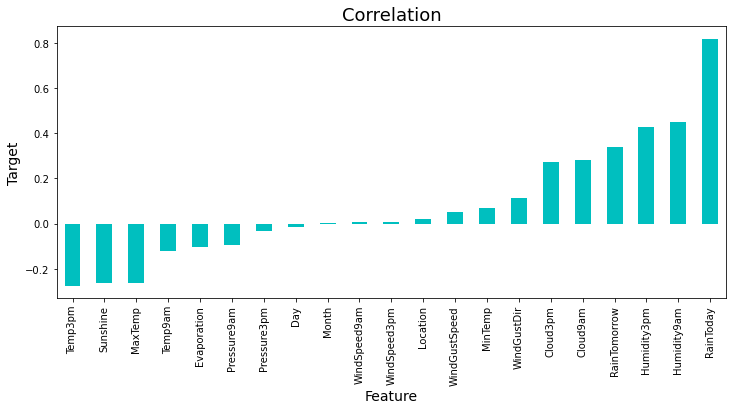

In [48]:
# for Rainfall
plt.figure(figsize=(12,5))
df.corr()['Rainfall'].sort_values(ascending=True).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [49]:
df.corr()["Rainfall"].sort_values().to_frame("Correlation in Ascending order")

,Correlation in Ascending order
Temp3pm,-0.275948
Sunshine,-0.262595
MaxTemp,-0.261491
Temp9am,-0.123571
Evaporation,-0.102360
Pressure9am,-0.096129
Pressure3pm,-0.031989
Day,-0.013407
Month,0.003950
WindSpeed9am,0.005702


1. Negative Correlation: The following features exhibit weak to moderately negative correlations with the target variable "Rainfall": "Sunshine," "Temp3pm," "MaxTemp," "Pressure9am," "Pressure3pm," "Day." This implies that higher values of these features are associated with slightly lower rainfall amounts.

2. Positive Correlation: The following features show weak to moderately positive correlations with "Rainfall":"Month","WindSpeed9am","WindSpeed3pm," "WindGustDir," "WindDir3pm," "WindSpeed9am," "Evaporation," "WindDir9am," "WindGustSpeed," "MinTemp," "Cloud3pm," "Cloud9am," "RainTomorrow," "Humidity9am," "Humidity3pm," "RainToday." This suggests that higher values of these features are linked to slightly higher rainfall amounts. Notably, "RainToday" has the highest positive correlation with "Rainfall," indicating that significant rainfall today might be indicative of higher rainfall the following day.

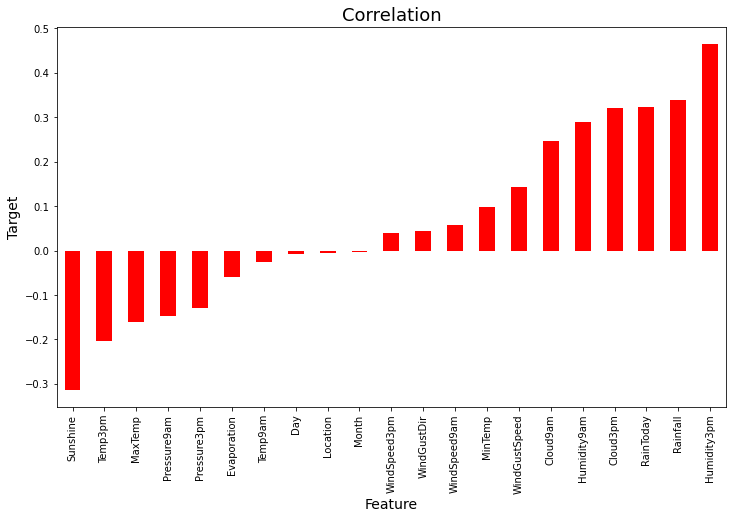

In [50]:
plt.figure(figsize=(12,7))
df.corr()['RainTomorrow'].sort_values(ascending=True).drop(['RainTomorrow']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [51]:
df.corr()["RainTomorrow"].sort_values().to_frame("Correlation in Aescending order")

,Correlation in Aescending order
Sunshine,-0.313493
Temp3pm,-0.203498
MaxTemp,-0.161432
Pressure9am,-0.148018
Pressure3pm,-0.128375
Evaporation,-0.059455
Temp9am,-0.026060
Day,-0.007560
Location,-0.004506
Month,-0.003575


<AxesSubplot:>

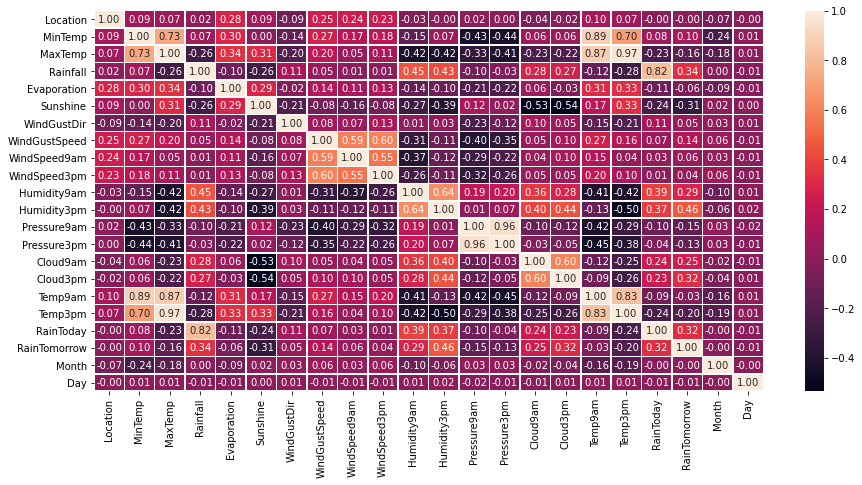

In [52]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

In [53]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
Day              0
dtype: int64

In [54]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [55]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [56]:
# need to handle oversampling of target colum using SMOTE
from imblearn.over_sampling import SMOTE

In [57]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [58]:
y.value_counts()

1    5190
0    5190
Name: RainTomorrow, dtype: int64

In [59]:
#target column: Rainfall


In [60]:
x1=df.drop("Rainfall",axis=1)
y1=df["Rainfall"]

In [61]:
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

In [62]:
#The Variance Threshold method allows you to eliminate low-variance features, which often correspond to constant or
#near-constant values, to reduce the dimensionality of the dataset and potentially improve model performance.

In [63]:
# target column: RainTomorrow

In [64]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif

In [65]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [66]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [67]:
x.columns[var_threshold.get_support()]

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Month', 'Day'],
      dtype='object')

In [69]:
# taking  out  all the  constent  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))


0


In [70]:
#  target column : Rainfall

In [71]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x1)

VarianceThreshold(threshold=0)

In [72]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [73]:
x1.columns[var_threshold.get_support()]

Index(['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month',
       'Day'],
      dtype='object')

In [74]:
cons_columns1 = [column for column in x1.columns
               if column not in x1.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


In [75]:
# solving multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# target column : RainTomorrow

In [76]:
#  Target Variable is primary_fuel
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.266554,Location
1,9.468116,MinTemp
2,27.937677,MaxTemp
3,4.059328,Rainfall
4,1.547637,Evaporation
5,2.256509,Sunshine
6,1.398382,WindGustDir
7,2.236169,WindGustSpeed
8,2.213334,WindSpeed9am
9,1.950324,WindSpeed3pm


My threshold value is 10 and there are number of data higher than the threshold value so drop the highest value column

In [78]:
x.drop("Temp3pm",axis = 1,inplace = True)

In [80]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.265626,Location
1,9.435034,MinTemp
2,10.820483,MaxTemp
3,4.048988,Rainfall
4,1.541661,Evaporation
5,2.247608,Sunshine
6,1.388666,WindGustDir
7,2.186565,WindGustSpeed
8,2.203427,WindSpeed9am
9,1.950229,WindSpeed3pm


In [81]:
x.drop("Pressure9am",axis=1,inplace = True)

In [82]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.251461,Location
1,9.432654,MinTemp
2,10.418886,MaxTemp
3,4.043052,Rainfall
4,1.525906,Evaporation
5,2.217839,Sunshine
6,1.196909,WindGustDir
7,2.179057,WindGustSpeed
8,2.171950,WindSpeed9am
9,1.926707,WindSpeed3pm


In [83]:
x.drop("Temp9am",axis=1,inplace = True)

In [84]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.244850,Location
1,4.813215,MinTemp
2,5.788326,MaxTemp
3,4.040959,Rainfall
4,1.520593,Evaporation
5,2.214299,Sunshine
6,1.195946,WindGustDir
7,2.151676,WindGustSpeed
8,2.154018,WindSpeed9am
9,1.889928,WindSpeed3pm


In [85]:
# target column : Rainfall

In [86]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.280330,Location
1,8.362108,MinTemp
2,27.894241,MaxTemp
3,1.500675,Evaporation
4,2.072728,Sunshine
5,1.364441,WindGustDir
6,2.196882,WindGustSpeed
7,2.088745,WindSpeed9am
8,1.841190,WindSpeed3pm
9,4.162025,Humidity9am


here also more than one columns has increase threshold value

In [87]:
x1.drop("Temp3pm",axis = 1,inplace = True)

In [88]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.279846,Location
1,8.321195,MinTemp
2,10.047404,MaxTemp
3,1.493983,Evaporation
4,2.068628,Sunshine
5,1.356054,WindGustDir
6,2.149276,WindGustSpeed
7,2.083860,WindSpeed9am
8,1.840973,WindSpeed3pm
9,3.631858,Humidity9am


In [89]:
x1.drop("Pressure9am",axis = 1,inplace = True)

In [90]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.258064,Location
1,8.308774,MinTemp
2,9.649935,MaxTemp
3,1.480581,Evaporation
4,2.044135,Sunshine
5,1.181079,WindGustDir
6,2.134260,WindGustSpeed
7,2.060515,WindSpeed9am
8,1.821545,WindSpeed3pm
9,3.631812,Humidity9am


In [91]:
x1.drop("Temp9am",axis = 1,inplace = True)

In [92]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['Features'] = x1.columns
vif

,VIF values,Features
0,1.248923,Location
1,4.439710,MinTemp
2,5.383208,MaxTemp
3,1.474745,Evaporation
4,2.042223,Sunshine
5,1.179582,WindGustDir
6,2.115875,WindGustSpeed
7,2.032709,WindSpeed9am
8,1.779926,WindSpeed3pm
9,2.459825,Humidity9am


In [93]:
# target column : RainTomorrow

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [95]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8227360308285164  on Random_state  33


In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [97]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.7748876043673731
confusion_matrix: 
 [[1237  311]
 [ 390 1176]]
classification_report: 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1548
           1       0.79      0.75      0.77      1566

    accuracy                           0.77      3114
   macro avg       0.78      0.78      0.77      3114
weighted avg       0.78      0.77      0.77      3114



In [98]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_rfc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_rfc))
print("classification_report: \n",classification_report(y_test,pred_rfc))

accuracy_score:  0.8930635838150289
confusion_matrix: 
 [[1361  187]
 [ 146 1420]]
classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1548
           1       0.88      0.91      0.90      1566

    accuracy                           0.89      3114
   macro avg       0.89      0.89      0.89      3114
weighted avg       0.89      0.89      0.89      3114



In [99]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.817276814386641
confusion_matrix: 
 [[1227  321]
 [ 248 1318]]
classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1548
           1       0.80      0.84      0.82      1566

    accuracy                           0.82      3114
   macro avg       0.82      0.82      0.82      3114
weighted avg       0.82      0.82      0.82      3114



In [100]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.8342967244701349
confusion_matrix: 
 [[1136  412]
 [ 104 1462]]
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1548
           1       0.78      0.93      0.85      1566

    accuracy                           0.83      3114
   macro avg       0.85      0.83      0.83      3114
weighted avg       0.85      0.83      0.83      3114



In [101]:
# cross validation score

In [102]:
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.7049132947976879


In [103]:
print('CV score for Random forest Classifier: ',cross_val_score(rfc,x,y,cv=5).mean())

CV score for Random forest Classifier:  0.680057803468208


In [104]:
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.6738921001926783


In [105]:
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.7060693641618497


From the observation of accuracy and cross validation score and their difference we can predict that Logistic regression is the best model.

In [106]:
parameter = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag'],
    'max_iter': [100, 200, 300]
}

In [107]:
gcv=GridSearchCV(LogisticRegression(),parameter,cv=5)

In [108]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag']})

In [109]:
gcv.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [112]:
final_model=LogisticRegression(C=1,max_iter=100,penalty= 'l1' ,solver ='liblinear' )
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc)
print(confusion)

0.7745664739884393
[[1236  312]
 [ 390 1176]]


In [113]:
#  ROC-AUC Curve
fpr,tpr,thresholds = roc_curve(y_test,pred,pos_label=True)

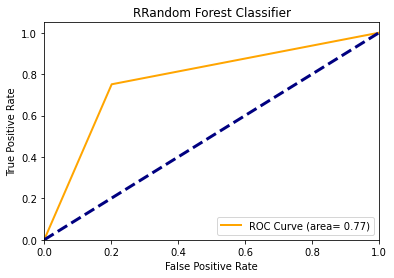

In [114]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=2,label = "ROC Curve (area= %0.2f)" % acc)
plt.plot([0,1],[0,1],color="navy",lw=3,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RRandom Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [115]:
import pickle

In [116]:
pickle.dump(gcv,open('Global_Power_Plant.pickle','wb'))
loaded_model = pickle.load(open('Global_Power_Plant.pickle', 'rb'))
loaded_model.predict(x_test)

array([1, 0, 1, ..., 0, 1, 1])

In [117]:
  #Checking predicted and original values
a =np.array(y_test)
predicted=np.array(gcv.predict(x_test))
Global_Power_Plant=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Global_Power_Plant

,Orginal,Predicted
0,1,1
1,1,0
2,1,1
3,1,0
4,0,0
...,...,...
3109,1,1
3110,1,1
3111,0,0
3112,1,1


In [118]:
# target column: Rainfall

In [119]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score, classification_report, mean_absolute_error, mean_squared_error

In [120]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = .30, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.5124124206912899 on random_state: 96


In [121]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

In [122]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("R2 score: ", r2_score(y_test, pred_lr))
print("Mean abs error: ", mean_absolute_error(y_test, pred_lr))
print("Mean squared error: ",mean_squared_error(y_test,pred_lr))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 score:  0.7165754187094091
Mean abs error:  0.3660760099554879
Mean squared error:  0.2901591394830176
Root Mean Squared Error:  0.5386642177488844


In [124]:
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)


print("R2 score: ", r2_score(y_test, pred_RFR))
print("Mean abs error: ", mean_absolute_error(y_test, pred_RFR))
print("Mean squared error: ", mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2 score:  0.7379051086151163
Mean abs error:  0.3215234856526719
Mean squared error:  0.26832262678430396
Root Mean Squared Error:  0.5179986745005281


In [126]:
knn=KNN(n_neighbors=9 )
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("R2 score: ", r2_score(y_test, pred_knn))
print("Mean abs error: ", mean_absolute_error(y_test, pred_knn))
print("Mean squared error: ", mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 score:  0.6905992664798468
Mean abs error:  0.34386172111358415
Mean squared error:  0.3167525208463718
Root Mean Squared Error:  0.5628077121418751


In [128]:
DTR= DecisionTreeRegressor(random_state=29)
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)


print("R2 score: ", r2_score(y_test, pred_DTR))
print("Mean abs error: ", mean_absolute_error(y_test, pred_DTR))
print("Mean squared error: ", mean_squared_error(y_test,pred_DTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2 score:  0.49478474556740015
Mean abs error:  0.32510445595670334
Mean squared error:  0.5172198643192404
Root Mean Squared Error:  0.719179994381963


In [130]:
print('The CV score  for Linear_regression is :',cross_val_score(lr,x1,y1,cv=7).mean())

The CV score  for Linear_regression is : 0.6922216301355781


In [131]:
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x1,y1,cv=7).mean())

The CV  score for  the Random forest regressor is: 0.6923347095174568


In [132]:
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x1,y1,cv=7).mean())

The CV score  for  the KNN regressor is : 0.6617941992939554


In [133]:
print('The CV score  for  the DTR is :',cross_val_score(DTR,x1,y1,cv=7).mean())

The CV score  for  the DTR is : 0.3627448899775572


From the observation of R2 Score and cross validation score and their difference we can predict that Linear Regression is the best model.

In [134]:
parameter = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, -1]  
}

In [135]:
GridCV = GridSearchCV(LinearRegression(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [136]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, -1],
                         'normalize': [True, False]},
             verbose=1)

In [137]:
GridCV.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'normalize': True}

In [138]:
Best_model_Regressor = LinearRegression( copy_X= 'True', fit_intercept= 'False', n_jobs= 1, normalize = 'True')
Best_model_Regressor.fit(x_train,y_train)
pred = Best_model_Regressor.predict(x_test)
acc = r2_score(y_test,pred_RFR)
print(acc*100)

73.79051086151162


In [139]:
filename='Global_Power_Plant_Database_Project.pickle'
pickle.dump(Best_model_Regressor,open(filename,'wb'))
loaded_model_r = pickle.load(open(filename, 'rb'))
loaded_model_r.predict(x_test)

array([-0.55010126,  1.35441453, -0.49776848, ..., -0.2315313 ,
        1.3754216 , -0.57918536])

In [140]:
a = np.array(y_test)
predicted = np.array(Best_model_Regressor.predict(x_test))
Global_Power_Plant_Database_Project = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Global_Power_Plant_Database_Project

,Original,Predicted
0,-0.734568,-0.550101
1,1.292926,1.354415
2,-0.734568,-0.497768
3,1.292926,1.592045
4,-0.734568,-0.307383
...,...,...
2024,1.525260,1.502833
2025,-0.734568,-0.419312
2026,0.787096,-0.231531
2027,1.408239,1.375422
